In [1]:
from advanced_indicators.myfunctions import * 
import matplotlib.pyplot as plt

In [2]:
#-- Load data
# data = pd.read_csv(r"")
import yfinance as yf 

data = yf.download('XMR-USD', '2023-01-01','2024-03-01')

#-- all column names lowercase
data.columns = map(str.lower, data.columns)

[*********************100%***********************]  1 of 1 completed


In [3]:
# disparity_idx_indc(data)
# disp = disp_idx(data, 14)


# df_X = disparity_index(data)

In [4]:
data,buy_prices, sell_prices= disparity_index(data)

In [5]:
len(buy_prices), len(sell_prices), len(data)

(425, 425, 425)

KeyError: 'buy_price'

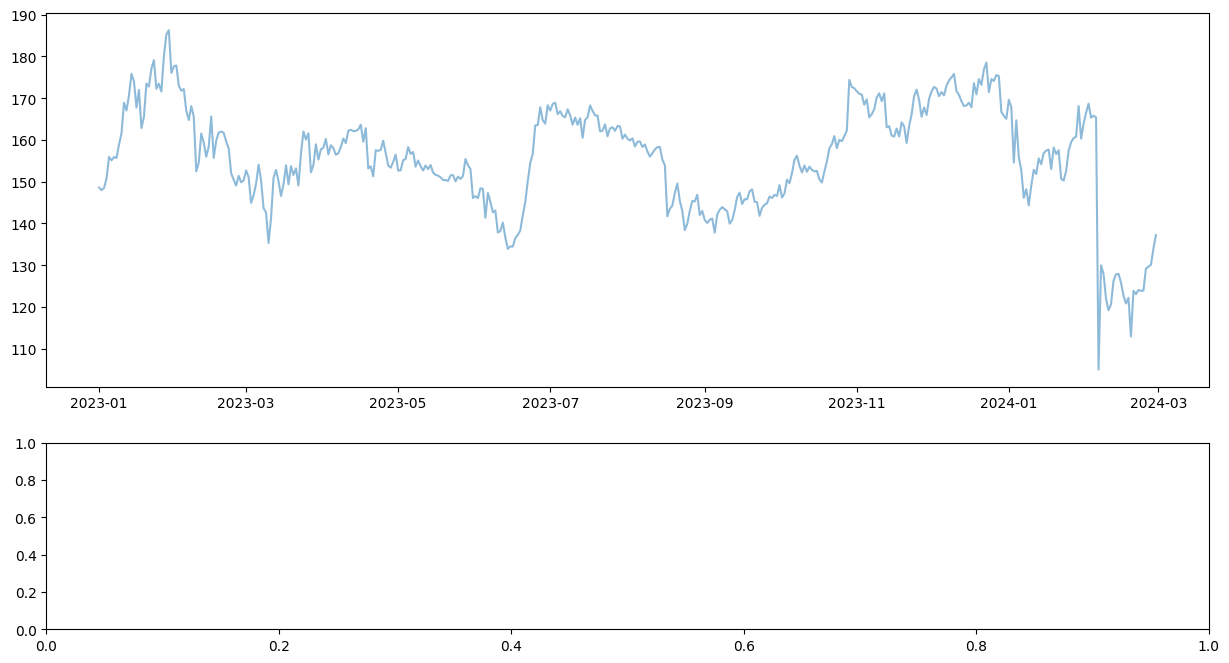

In [6]:
def disparity_strategy_and_plot(data):

    data, buy_prices, sell_prices,  = disparity_index(data)

    # Plotting the buy and sell signals along with DI
    fig, ax = plt.subplots(2, 1, figsize=(15, 8), gridspec_kw={'height_ratios': [2, 1]})
    
    # Plotting the stock price and signals
    ax[0].plot(data['close'], label='Close Price', alpha=0.5)
    ax[0].scatter(data.index, data['buy_price'], label='Buy Signal', marker='^', color='green', s=100)
    ax[0].scatter(data.index, data['sell_price'], label='Sell Signal', marker='v', color='red', s=100)
    ax[0].set_title(' - Buy & Sell Signals')
    ax[0].set_ylabel('Price')
    ax[0].legend()

    # Plotting the Disparity Index with bars
    ax[1].bar(data.index, data['disp'], color=np.where(data['disp'] >= 0, '#26a69a', '#ef5350'))
    ax[1].axhline(0, color='gray', linestyle='--')  # Add a line at zero
    ax[1].set_title(' - 14-Period Disparity Index')
    ax[1].set_xlabel('Date')
    ax[1].set_ylabel('Disparity Index (%)')

    plt.tight_layout()
    plt.show()


# Example usage
disparity_strategy_and_plot(data)

In [ ]:
df_X

,open,high,low,close,adj close,volume,rvi,rvi_signal,buy_long,sell_short
Date,,,,,,,,,,
2023-01-01,147.309662,148.931030,146.437485,148.576935,148.576935,36453347,NaN,NaN,False,False
2023-01-02,148.582184,149.623535,147.943558,147.943558,147.943558,47050925,NaN,NaN,False,False
2023-01-03,147.933929,149.027832,147.628860,148.487930,148.487930,48662135,NaN,NaN,False,False
2023-01-04,148.466995,152.488983,148.342621,150.743652,150.743652,83915181,NaN,NaN,False,False
2023-01-05,150.790253,155.921738,150.769043,155.921738,155.921738,78049428,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...
2024-02-25,123.894104,129.351898,123.056015,129.174301,129.174301,597868068,0.045715,-0.021324,True,False
2024-02-26,129.174911,129.889282,128.422272,129.613281,129.613281,53208623,0.107926,-0.027936,False,False
2024-02-27,129.600189,130.350296,129.596710,130.061203,130.061203,72506717,0.155605,0.000478,False,False


In [ ]:
plot_data(df_X)

NameError: name 'plot_data' is not defined

In [ ]:
# def test():
#     assert myfunctions.chopp_idx_signals(data)

# test()